### Dublin Airbnb Market Analysis

In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
import scipy.stats as ss
import statsmodels.api as sm

In [3]:
#Loading the data into csv file
contacts=pd.read_csv(r"C:\Users\Ammu\OneDrive\Documents\contacts.txt",delimiter='\t')
searches=pd.read_csv(r"C:\Users\Ammu\OneDrive\Documents\searches.txt",delimiter='\t')

In [4]:
searches["ds"]=pd.to_datetime(searches["ds"])
searches["ds_checkin"]=pd.to_datetime(searches["ds_checkin"])
searches["ds_checkout"]=pd.to_datetime(searches["ds_checkout"])
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ds                    35737 non-null  datetime64[ns]
 1   id_user               35737 non-null  object        
 2   ds_checkin            23888 non-null  datetime64[ns]
 3   ds_checkout           23888 non-null  datetime64[ns]
 4   n_searches            35737 non-null  int64         
 5   n_nights              23888 non-null  float64       
 6   n_guests_min          35737 non-null  int64         
 7   n_guests_max          35737 non-null  int64         
 8   origin_country        35737 non-null  object        
 9   filter_price_min      13322 non-null  float64       
 10  filter_price_max      13322 non-null  float64       
 11  filter_room_types     16191 non-null  object        
 12  filter_neighborhoods  1346 non-null   object        
dtypes: datetime64[ns

### 1) What guests are searching for in Dublin

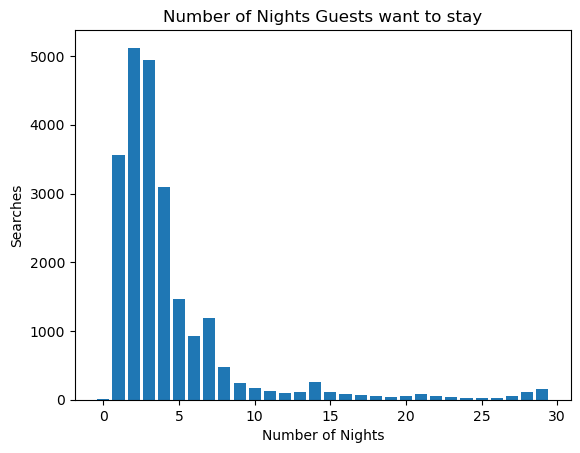

In [5]:
#Find how long do usually guest want to stay in (num of nights)
nights_count = searches.groupby('n_nights').id_user.count().reset_index()

#Due to dramatic outliers present, set limit of 95% data (up to 29 day)
perc_95 = np.percentile(searches[searches['n_nights'].notna()]['n_nights'], 95)
nights_count = nights_count[nights_count['n_nights']<=perc_95]

#Build bar chart to compare
plt.bar(nights_count['n_nights'], nights_count['id_user'])
plt.xlabel('Number of Nights')
plt.ylabel('Searches')
plt.title('Number of Nights Guests want to stay')

plt.show()

### Majority of the people are wanted to stay either 2 nights or 3 nights in this plot we can conclude that half of the people are willing to stay either 2 or 3 nights in dublin

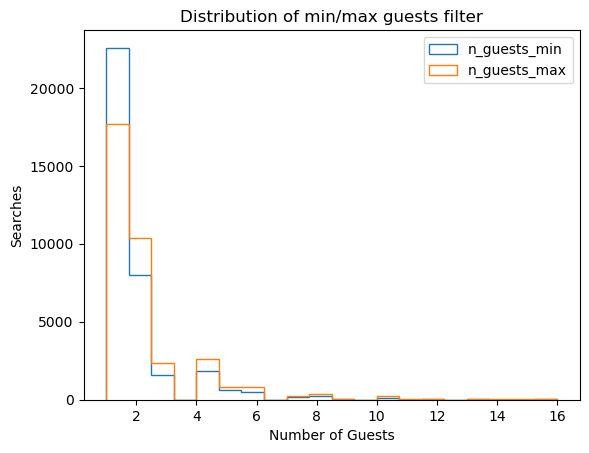

In [6]:
#Build distribution plot of max and min expected guests to determine popular sceneries
plt.hist(searches['n_guests_min'], histtype='step', bins=20, label='n_guests_min')
plt.hist(searches['n_guests_max'], histtype='step', bins=20, label='n_guests_max')
plt.xlabel('Number of Guests')
plt.ylabel('Searches')
plt.title('Distribution of min/max guests filter')
plt.legend()

plt.show()

### Here we can clearly see that most of the guests who are coming to Dublin are searching for a house which suits for 1-2 person and one more thing we can justify that mostly 2 people are coming together for dublin

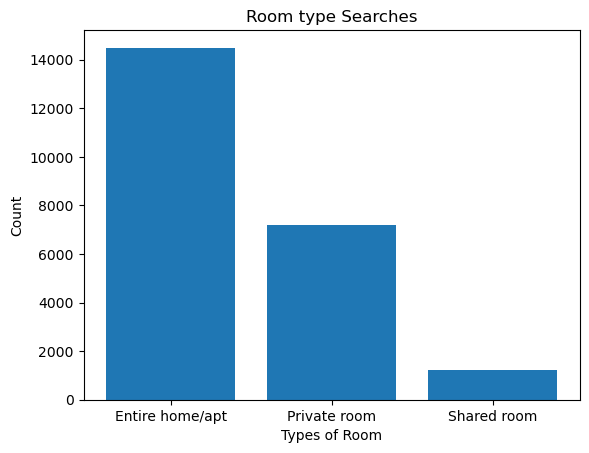

In [7]:
#Types of room searched for
room_filter = searches['filter_room_types'].copy().dropna()

#As users can choose several room types at one search, create loop to separate them
room_list = []
for sets in room_filter:
    for room in sets.split(','):
        room_list.append(room)

#Create DataFrame based on list and clean up blank cells
room_df = pd.DataFrame(room_list, columns=['type'])
room_df.drop(room_df[room_df['type']==''].index, inplace=True)

#Group by type to find total times when each type occurs in searches
types_grouped = room_df.groupby('type').size().reset_index(name='count')

#Build bar chart
plt.bar(types_grouped['type'], types_grouped['count'])
plt.xlabel('Types of Room')
plt.ylabel('Count')
plt.title('Room type Searches')

plt.show()

### Most of people are wanted to book for accommodation in Dublin is Entire home/apt

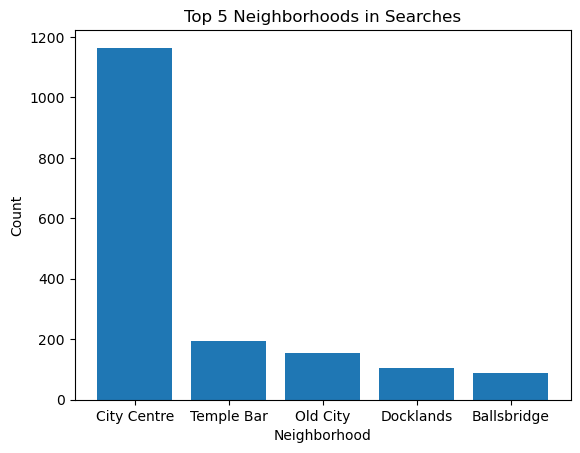

In [8]:
# Assume 'No Preference' for null values in the 'filter_neighborhoods' field
neighborhood = searches['filter_neighborhoods'].fillna('No Preference')

# Split neighborhoods and create a DataFrame
nhood_list = []
for items in neighborhood:
    for item in items.split(','):
        if item.strip():  # Ensure it's not an empty string
            nhood_list.append(item.strip())

nhood_df = pd.DataFrame(nhood_list, columns=['name'])

# Filter out 'No Preference' from the DataFrame
nhood_df = nhood_df[nhood_df['name'] != 'No Preference']

# Group neighborhoods to count occurrences in searches
nhood_grouped = nhood_df.value_counts().reset_index(name='count')

# Select the top 5 neighborhoods
top_5_nhoods = nhood_grouped.head(5)

# Plot a bar chart for the top 5 neighborhoods
plt.bar(top_5_nhoods['name'], top_5_nhoods['count'])
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Top 5 Neighborhoods in Searches')
plt.show()

### If we see the preference of neighborhood 'City Center' is the place where people want to stay in Dublin

In [9]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ds                    35737 non-null  datetime64[ns]
 1   id_user               35737 non-null  object        
 2   ds_checkin            23888 non-null  datetime64[ns]
 3   ds_checkout           23888 non-null  datetime64[ns]
 4   n_searches            35737 non-null  int64         
 5   n_nights              23888 non-null  float64       
 6   n_guests_min          35737 non-null  int64         
 7   n_guests_max          35737 non-null  int64         
 8   origin_country        35737 non-null  object        
 9   filter_price_min      13322 non-null  float64       
 10  filter_price_max      13322 non-null  float64       
 11  filter_room_types     16191 non-null  object        
 12  filter_neighborhoods  1346 non-null   object        
dtypes: datetime64[ns

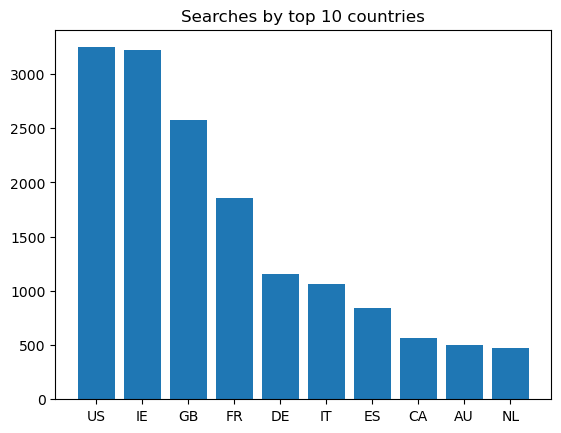

In [12]:
#User's origin country variation
user_country = searches[['id_user', 'origin_country']]

#Group by country to find unique users
country = user_country.groupby('origin_country').id_user.nunique().reset_index()

#As users from 131 country are interested in Dublin, let's keep top 10 of them
top_10_country = country.sort_values('id_user', ascending=False).head(10)

#Build bar chart
plt.bar(top_10_country['origin_country'], top_10_country['id_user'])
plt.title('Searches by top 10 countries')

plt.show()

### According to the visualization, we can clearly see that US people are showing more interest to go for Dublin, along with there being a slight difference between the USA and Ireland, apart from that Ireland people are showing more interest in visiting Dublin.

### 2) Which inquiries hosts tend to accept.

In [13]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_guest        7823 non-null   object
 1   id_host         7823 non-null   object
 2   id_listing      7823 non-null   object
 3   ts_contact_at   7823 non-null   object
 4   ts_reply_at     7219 non-null   object
 5   ts_accepted_at  3627 non-null   object
 6   ts_booking_at   2174 non-null   object
 7   ds_checkin      7823 non-null   object
 8   ds_checkout     7823 non-null   object
 9   n_guests        7823 non-null   int64 
 10  n_messages      7823 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 672.4+ KB


In [14]:
#Change string date fields to datetime format for easier analysis
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])

In [15]:
contacts['status'] = contacts['ts_accepted_at'].apply(lambda x: 'Accepted' if pd.notna(x) else 'Not Accepted')

In [16]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_guest        7823 non-null   object        
 1   id_host         7823 non-null   object        
 2   id_listing      7823 non-null   object        
 3   ts_contact_at   7823 non-null   datetime64[ns]
 4   ts_reply_at     7219 non-null   datetime64[ns]
 5   ts_accepted_at  3627 non-null   datetime64[ns]
 6   ts_booking_at   2174 non-null   datetime64[ns]
 7   ds_checkin      7823 non-null   datetime64[ns]
 8   ds_checkout     7823 non-null   datetime64[ns]
 9   n_guests        7823 non-null   int64         
 10  n_messages      7823 non-null   int64         
 11  status          7823 non-null   object        
dtypes: datetime64[ns](6), int64(2), object(4)
memory usage: 733.5+ KB


In [17]:
# Calculate the number of nights and change data type to int
contacts['n_nights_cont'] = (contacts['ds_checkout'] - contacts['ds_checkin']).dt.days

# Group by the number of confirmed nights and status
nights_status = contacts.groupby(['n_nights_cont', 'status']).size().unstack(fill_value=0)

# Check if 'Accepted' and 'Not Accepted' columns exist
if 'Accepted' in nights_status.columns and 'Not Accepted' in nights_status.columns:
    # Add 'Total contacts' column
    nights_status['Total contacts'] = nights_status['Accepted'] + nights_status['Not Accepted']

nights_status.head()

status,Accepted,Not Accepted,Total contacts
n_nights_cont,,,
1,483,667,1150
2,854,897,1751
3,890,880,1770
4,543,613,1156
5,227,251,478


Text(0.5, 1.0, 'NOT Accepted by hosts')

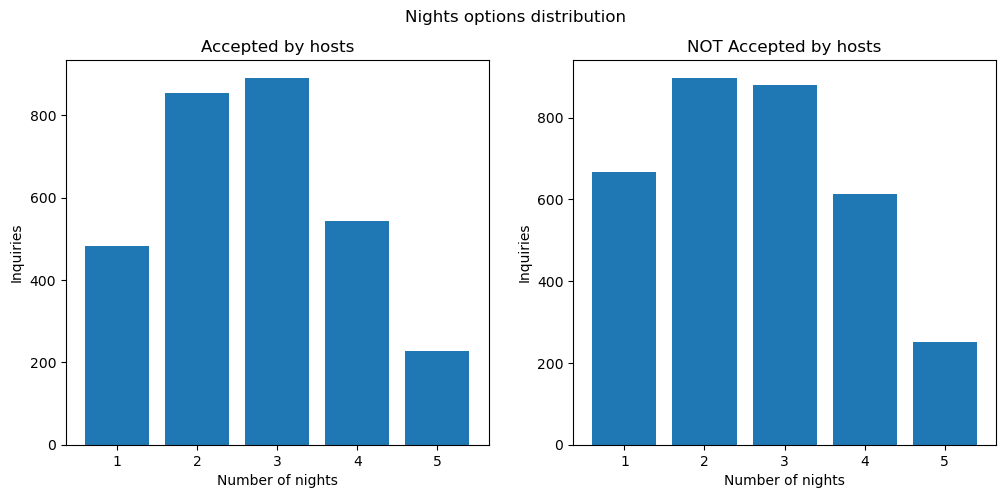

In [18]:
nights_status_head = nights_status.head()
plt.figure(figsize=(12, 5))
plt.suptitle('Nights options distribution')

plt.subplot(1, 2, 1)
plt.bar(nights_status_head.index, nights_status_head['Accepted'])
plt.xlabel('Number of nights')
plt.ylabel('Inquiries')
plt.title('Accepted by hosts')

plt.subplot(1, 2, 2)
plt.bar(nights_status_head.index, nights_status_head['Not Accepted'])
plt.xlabel('Number of nights')
plt.ylabel('Inquiries')
plt.title('NOT Accepted by hosts')

### While the manager gets a lot of booking requests, he accepts in around a 50:50 ratio.

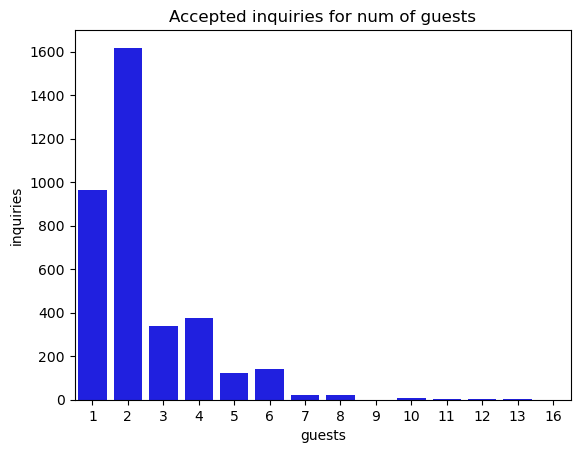

In [19]:
#Accepted inquiries for num of guests
guests_status = contacts.groupby(['n_guests', 'status']).size().reset_index(name='count')
guests_accepted = guests_status[guests_status['status']=='Accepted']

#Bulit bar chart
sns.barplot(data=guests_accepted, x='n_guests', y='count', color='blue')
plt.xlabel('guests')
plt.ylabel('inquiries')
plt.title('Accepted inquiries for num of guests')

plt.show()

### Host is more willing to accept the inquiries if the count of guests is 2

### 3) What the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin

To address the gaps between guest demand and host supply, an analysis was conducted on the available data, focusing on the 'filter_room_types' column from the searches dataset. Out of 16,191 data points, it was observed that the most frequently searched room types were 'entire house' and 'private room'. Specifically, 12,963 searches were for an entire house.

Upon merging the searches and contacts datasets based on user ID, check-in and check-out dates, and the number of guests, a consolidated dataset of 9,718 rows and 21 columns was obtained. Within this merged dataset, there were a total of 4,446 accepted bookings. Among these, 1,733 were for entire houses, while 1,283 were for private rooms.

This analysis revealed a significant disparity: while 80% of the searches were for entire houses, only 38% of the accommodations provided were of this type. It's apparent that the mismatch between guest demand and the supply provided by hosts is quite significant.

To bridge this gap and increase bookings in Dublin, a potential strategy could be for hosts to align their offerings more closely with the predominant guest demand. By catering to the prevalent request for entire houses, hosts can potentially enhance their business and appeal to a larger segment of potential guests. Adjusting their offerings to better match the most sought-after accommodation types could lead to increased bookings and improved guest satisfaction.

### 4) What other data would be useful to have to deepen the analysis and understanding.

Post Property Details:

Property Size or Layout: Including information on square footage or the number of rooms can provide insights into accommodation preferences and space requirements.

Amenities Offered: Details about amenities such as WiFi availability, parking facilities, presence of a pool, or specific kitchen appliances can significantly influence guest choices.

Property Types: Categorizing properties as apartments, houses, or villas allows for tailored analysis based on accommodation preferences.

Customer Feedback (Ratings):

Service Quality: Gathering feedback on the quality of services offered provides crucial insights into the overall guest experience.

Cleanliness Ratings: Understanding how guests rate the cleanliness of the properties helps in evaluating standards and ensuring guest satisfaction.

Food Quality: Feedback on food quality, if applicable, is vital in understanding guest experiences, especially for properties providing meals.

Timeliness of Services: Assessing reviews regarding the timeliness of services offered can reveal areas needing improvement in promptness or efficiency.

Analyzing Reviews and Ratings for Listings:

By analyzing reviews and ratings, one can comprehensively assess guest satisfaction, identify areas for improvement, and gain a deeper understanding of the strengths and weaknesses of listed properties. This analysis contributes significantly to refining services,understanding guest expectations, and enhancing overall guest experiences.